updated ozone data on 02/11/2019
TODO List
1. Multivariate analysis of O3, CO, NO2 (Both carbon monoxide and nitrogen dioxide are precursor to ozone formation)and interaction with temperature.  Higher temperature means more ozone production.
2. seasonal trend and statistical analysis of variation over time e.g. if ozone is increasing with time during summer or winter season. 
3. Check for any anomaly in ozone or PM2.5 as it may be an indicator of long range transport of pollutants.
4. Develop prediction model and predict future trends of ozone and its impact on the health.



In [163]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

from scipy.stats import linregress, stats
from textwrap import wrap
from scipy import optimize

In [164]:
# to read excel file with multiple sheets 2010-2018
xls = pd.ExcelFile('Resource1/CA-daily-O3-ppb-2010-2018-Alexis.xlsx', )
ozone_2010 = pd.read_excel(xls, '2010', encoding='utf8')
ozone_2011 = pd.read_excel(xls, '2011', encoding='utf8')
ozone_2012 = pd.read_excel(xls, '2012', encoding='utf8')
ozone_2013 = pd.read_excel(xls, '2013', encoding='utf8')
ozone_2014 = pd.read_excel(xls, '2014', encoding='utf8')
ozone_2015 = pd.read_excel(xls, '2015', encoding='utf8')
ozone_2016 = pd.read_excel(xls, '2016', encoding='utf8')
ozone_2017 = pd.read_excel(xls, '2017', encoding='utf8')
ozone_2018 = pd.read_excel(xls, '2018', encoding='utf8')
ozone_2018.head(10)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,6,1,7,44201,1,37.687526,-121.784217,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,25,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",43390
1,6,1,7,44201,1,37.687526,-121.784217,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,31,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",43390
2,6,1,7,44201,1,37.687526,-121.784217,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,4,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",43390
3,6,1,7,44201,1,37.687526,-121.784217,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,24,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",43390
4,6,1,7,44201,1,37.687526,-121.784217,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,22,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",43390
5,6,1,7,44201,1,37.687526,-121.784217,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,29,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",43390
6,6,1,7,44201,1,37.687526,-121.784217,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,17,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",43390
7,6,1,7,44201,1,37.687526,-121.784217,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,6,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",43390
8,6,1,7,44201,1,37.687526,-121.784217,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,25,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",43390
9,6,1,7,44201,1,37.687526,-121.784217,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,28,NaN,-,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",43390


In [165]:
# to view header of the columns
ozone_2018.columns
print(ozone_2018.columns)


Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'O3_ppb', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change'],
      dtype='object')


In [166]:
# remove extraneous columns from every df
sheets_O3 = [ozone_2010, ozone_2011, ozone_2012, ozone_2013, ozone_2014, ozone_2015, ozone_2016, ozone_2017, ozone_2018]
for df in sheets_O3:
    df.drop(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'City Name',
       'CBSA Name', 'Date of Last Change'], axis=1, inplace=True)
ozone_2017.head()

,Date Local,O3_ppb,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,County Name,Date of Last Change.1
0,2017-01-01,33.706,0.033706,0.035,9,32,Alameda,41839
1,2017-01-02,23.412,0.023412,0.032,9,30,Alameda,41839
2,2017-01-03,29.588,0.029588,0.033,15,31,Alameda,41839
3,2017-01-04,23.059,0.023059,0.025,20,23,Alameda,41839
4,2017-01-05,17.294,0.017294,0.029,9,27,Alameda,41839


In [167]:
for df in sheets_O3:
    df['Date Local'] = pd.to_datetime(df['Date Local'], format='%Y-%m-%d')
    df['Year'] = pd.DatetimeIndex(df['Date Local']).year
    df['Month'] = pd.DatetimeIndex(df['Date Local']).month

In [168]:
all_ozone = pd.concat(sheets_O3, sort=False)
print(all_ozone.head())

  Date Local  O3_ppb  Arithmetic Mean  1st Max Value  1st Max Hour  AQI  \
0 2010-01-01   7.632         0.007632          0.018            10   15   
1 2010-01-02  11.958         0.011958          0.020            11   17   
2 2010-01-03  14.458         0.014458          0.020             9   17   
3 2010-01-04   7.958         0.007958          0.015             9   13   
4 2010-01-05   3.667         0.003667          0.010             9    8   

  County Name  Year  Month  Date of Last Change.1  
0     Alameda  2010      1                    NaN  
1     Alameda  2010      1                    NaN  
2     Alameda  2010      1                    NaN  
3     Alameda  2010      1                    NaN  
4     Alameda  2010      1                    NaN  


In [169]:
#to view NAN values or zero values
all_ozone.isnull().sum()

Date Local                    0
O3_ppb                        0
Arithmetic Mean               0
1st Max Value                 0
1st Max Hour                  0
AQI                           0
County Name                   0
Year                          0
Month                         0
Date of Last Change.1    472359
dtype: int64

In [170]:
#fille NAN with zero
# Check with Alexis----??????
#all_ozone1 =all_ozone.fillna(0)
#all_ozone1.head()

In [171]:
#use double square bracket when a subset is used from orignal data set instead of dropping columns from dataframes
#all_ozone2 = all_ozone1[['County Name', 'Arithmetic Mean', '1st Max Value', '1st Max Hour', 'Year','Date Local']]
all_ozone2 = all_ozone.rename(columns={'County Name': 'County', 'Arithmetic Mean': 'Arithmetic_Mean_ppm', 'O3_ppb': 'Ozone_ppb', '1st Max Value': 'First_Max_Value', '1st Max Hour':'First_Max_Hour', 'Date Local': 'Date_Local'})
#all_RH2.columns=[c.replace(' ','_') for c in all_RH2.columns]
all_ozone2.head()

,Date_Local,Ozone_ppb,Arithmetic_Mean_ppm,First_Max_Value,First_Max_Hour,AQI,County,Year,Month,Date of Last Change.1
0,2010-01-01,7.632,0.007632,0.018,10,15,Alameda,2010,1,NaN
1,2010-01-02,11.958,0.011958,0.020,11,17,Alameda,2010,1,NaN
2,2010-01-03,14.458,0.014458,0.020,9,17,Alameda,2010,1,NaN
3,2010-01-04,7.958,0.007958,0.015,9,13,Alameda,2010,1,NaN
4,2010-01-05,3.667,0.003667,0.010,9,8,Alameda,2010,1,NaN


In [175]:
#which allows you to find out zero values. It treat both the index and columns of the frame as a column in the frame. The identifier index is used for the frame index; you can also use the name of the index to identify it in a query.
all_ozone3 =all_ozone2.query('(Arithmetic_Mean_ppm != 0) & (Ozone_ppb !=0) & (First_Max_Value != 0) & (First_Max_Hour != 0) & (AQI ! = 0)')
all_ozone3.head()

,Date_Local,Ozone_ppb,Arithmetic_Mean_ppm,First_Max_Value,First_Max_Hour,AQI,County,Year,Month,Date of Last Change.1
0,2010-01-01,7.632,0.007632,0.018,10,15,Alameda,2010,1,NaN
1,2010-01-02,11.958,0.011958,0.020,11,17,Alameda,2010,1,NaN
2,2010-01-03,14.458,0.014458,0.020,9,17,Alameda,2010,1,NaN
3,2010-01-04,7.958,0.007958,0.015,9,13,Alameda,2010,1,NaN
4,2010-01-05,3.667,0.003667,0.010,9,8,Alameda,2010,1,NaN


In [176]:
# create new column for month by extracting from Date_local
all_ozone3['Month'] = pd.DatetimeIndex(all_ozone3['Date_Local']).month
all_ozone3.head()

C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date_Local,Ozone_ppb,Arithmetic_Mean_ppm,First_Max_Value,First_Max_Hour,AQI,County,Year,Month,Date of Last Change.1
0,2010-01-01,7.632,0.007632,0.018,10,15,Alameda,2010,1,NaN
1,2010-01-02,11.958,0.011958,0.020,11,17,Alameda,2010,1,NaN
2,2010-01-03,14.458,0.014458,0.020,9,17,Alameda,2010,1,NaN
3,2010-01-04,7.958,0.007958,0.015,9,13,Alameda,2010,1,NaN
4,2010-01-05,3.667,0.003667,0.010,9,8,Alameda,2010,1,NaN


In [179]:
ozone_group1a= pd.DataFrame(all_ozone3.groupby(["Date_Local"]).mean()["Ozone_ppb"])

# ozone_group5 = pd.DataFrame(all_ozone_conc.groupby(["Year", "Month"]).mean()["Ozone (ppb)"])
# ozone_group5=ozone_group5.unstack(level=0)
ozone_group1a.head()

,Ozone_ppb
Date_Local,
2010-01-01,16.837653
2010-01-02,17.494717
2010-01-03,16.515261
2010-01-04,13.100993
2010-01-05,12.512835


In [180]:
ozone_group1b= pd.DataFrame(all_ozone3.groupby(["Date_Local"]).mean()["AQI"])

# ozone_group5 = pd.DataFrame(all_ozone_conc.groupby(["Year", "Month"]).mean()["Ozone (ppb)"])
# ozone_group5=ozone_group5.unstack(level=0)
ozone_group1b.head()

,AQI
Date_Local,
2010-01-01,22.598639
2010-01-02,22.924138
2010-01-03,22.035211
2010-01-04,17.856115
2010-01-05,17.625899


In [181]:
ozone_group2 = pd.DataFrame(all_ozone3.groupby(["Year", "Month"]).mean()["Ozone_ppb"])
ozone_group2= ozone_group2.unstack(level=0)
ozone_group2.head()

Ozone_ppb                                                         \
Year        2010       2011       2012       2013       2014       2015   
Month                                                                     
1      18.098439  17.231711  19.352226  20.479771  23.063186  17.740644   
2      22.427792  26.185114  26.918291  26.703509  26.836622  26.617030   
3      30.367817  29.462040  32.801113  32.439255  33.640572  34.331180   
4      34.295860  34.569461  36.597820  37.942251  39.613747  41.637056   
5      35.582212  38.861399  42.847691  40.983287  41.859341  41.628279   

                                        
Year        2016       2017       2018  
Month                                   
1      22.846971  25.733773  19.852526  
2      27.582109  28.179795  29.961704  
3      32.455284  32.861652  31.749764  
4      38.081861  39.592426  38.807708  
5      37.149632  39.404663  37.744938

In [185]:
ozone_AQI_group3 = pd.DataFrame(all_ozone3.groupby(["Year", "Month"]).mean()["AQI"])
ozone_AQI_group3= ozone_group2.unstack(level=0)
ozone_AQI_group3.tail()

           Year  Month
Ozone_ppb  2018  8        44.215029
                 9        33.774004
                 10       31.988355
                 11             NaN
                 12             NaN
dtype: float64

In [197]:
#Save file to output folder after grouping with year and month
ozone_group1a.to_csv("Output1\cumulative_ozone_series.csv" )

In [198]:
Bins=[0,20,40,60,110]
Group_name=['Low_O3', 'Moderate_O3','High_O3','Extreme_O3']

In [199]:
# #the binning is based on Ozone_ppb
all_ozone3["ozone_Levels"]=pd.cut(all_ozone3["Ozone_ppb"],Bins,labels=Group_name)
all_ozone3.head()

C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date_Local,Ozone_ppb,Arithmetic_Mean_ppm,First_Max_Value,First_Max_Hour,AQI,County,Year,Month,Date of Last Change.1,ozone_Levels
0,2010-01-01,7.632,0.007632,0.018,10,15,Alameda,2010,1,NaN,Low_O3
1,2010-01-02,11.958,0.011958,0.020,11,17,Alameda,2010,1,NaN,Low_O3
2,2010-01-03,14.458,0.014458,0.020,9,17,Alameda,2010,1,NaN,Low_O3
3,2010-01-04,7.958,0.007958,0.015,9,13,Alameda,2010,1,NaN,Low_O3
4,2010-01-05,3.667,0.003667,0.010,9,8,Alameda,2010,1,NaN,Low_O3


In [200]:
# #Save file to output folder as Binned O3
all_ozone3.to_csv("Output1\Binned_ozone.csv" )

In [202]:
# create new column for month by extracting from Date_local
all_ozone3['Month'] = pd.DatetimeIndex(all_ozone3['Date_Local']).month
all_ozone3.head()

C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date_Local,Ozone_ppb,Arithmetic_Mean_ppm,First_Max_Value,First_Max_Hour,AQI,County,Year,Month,Date of Last Change.1,ozone_Levels
0,2010-01-01,7.632,0.007632,0.018,10,15,Alameda,2010,1,NaN,Low_O3
1,2010-01-02,11.958,0.011958,0.020,11,17,Alameda,2010,1,NaN,Low_O3
2,2010-01-03,14.458,0.014458,0.020,9,17,Alameda,2010,1,NaN,Low_O3
3,2010-01-04,7.958,0.007958,0.015,9,13,Alameda,2010,1,NaN,Low_O3
4,2010-01-05,3.667,0.003667,0.010,9,8,Alameda,2010,1,NaN,Low_O3


In [203]:
#convert DF to array
ozone_date=pd.DatetimeIndex(all_ozone3["Date_Local"]).values
ozone_date

array(['2010-01-01T00:00:00.000000000', '2010-01-02T00:00:00.000000000',
       '2010-01-03T00:00:00.000000000', ...,
       '2018-09-28T00:00:00.000000000', '2018-09-29T00:00:00.000000000',
       '2018-09-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [204]:
ozone_values=all_ozone3["Ozone_ppb"].values
ozone_values

array([ 7.632, 11.958, 14.458, ..., 35.765, 26.588, 34.25 ])

In [205]:
ozone_date.dtype

dtype('<M8[ns]')

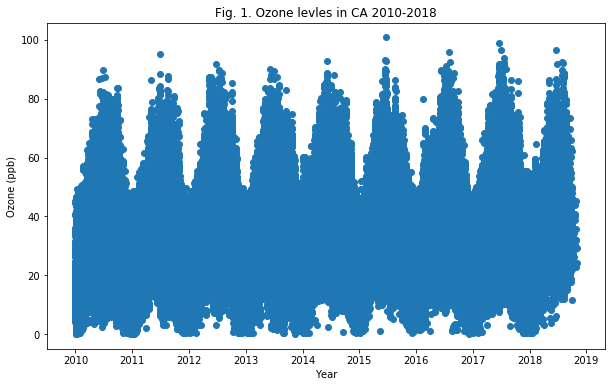

<Figure size 720x720 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [206]:
plt.scatter(ozone_date, ozone_values)
plt.title("Fig. 1. Ozone levles in CA 2010-2018")
plt.ylabel("Ozone (ppb)")
plt.xlabel("Year")
#plt.grid(linestyle="dashed")
#plt.ylim(-1,130)
#plt.xlim(-90,90)
#plt.xticks(rotation='horizontal')
#plt.axvline(x=0, color = 'black',linestyle="dashed") #adds a vertical line at the equator
# Save the figure
# Show plot
plt.figure(figsize=(10,10))
plt.show()
plt.savefig('Output1/CA-daily-O3 levels-2010_2018.png')

In [207]:
x_axis = ozone_date
y_axis = ozone_values

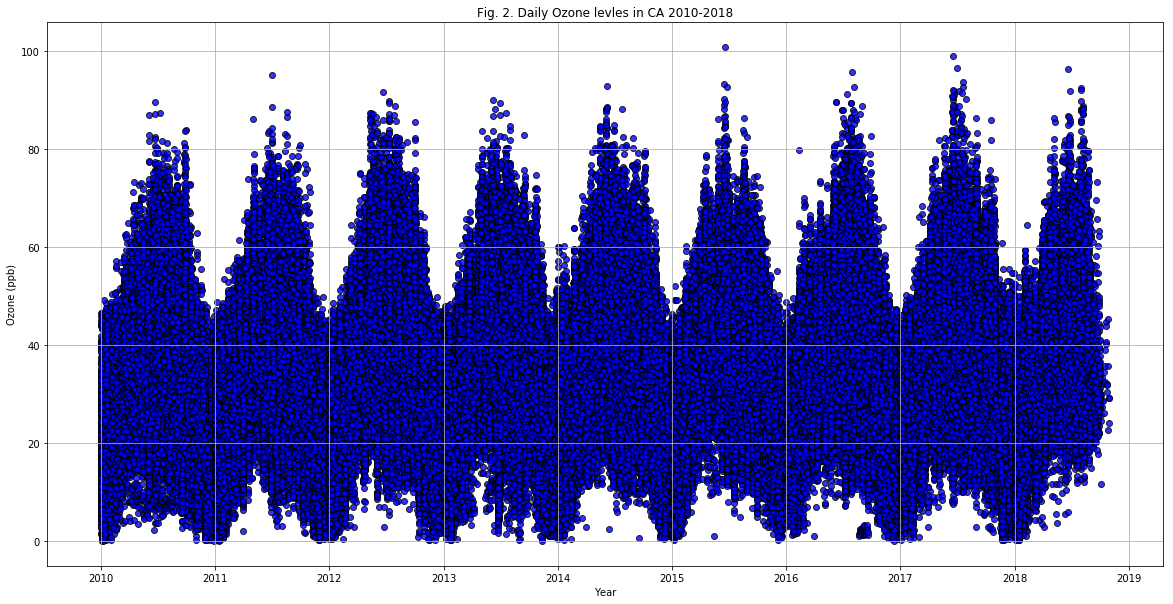

In [208]:
plt.figure(figsize=(20,10))
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", alpha= 0.8, edgecolors="black")
plt.title("Fig. 2. Daily Ozone levles in CA 2010-2018")
plt.ylabel("Ozone (ppb)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

In [209]:
plt.savefig('Output1/daily_O3_CA_2010_2018.png')

<Figure size 720x432 with 0 Axes>

# SARIMA-model_PyCON begins from here!!!!

In [450]:
dataset = pd.read_csv("./Output1/cumulative_ozone_series.csv")

# create new column for month by extracting from Date_local
# dataset['Month'] = pd.DatetimeIndex(dataset['Date_Local']).month
# dataset.tail(5)

In [451]:
from datetime import datetime
dataset['Month']= pd.to_datetime(dataset['Date_Local'], infer_datetime_format = True)
dataset=dataset.drop(['Date_Local'],axis=1)
IndexedDataset = dataset.set_index(['Month'])
IndexedDataset.tail()

,Ozone_ppb
Month,
2018-10-27,45.35300
2018-10-28,22.76500
2018-10-29,29.17600
2018-10-30,24.05900
2018-10-31,29.16700


In [452]:
IndexedDataset.count()

Ozone_ppb    3226
dtype: int64

In [453]:
dataset.to_csv("Output1\cumulative_ozone_SARIMA.csv" )

In [454]:
#convert DF to array
ozone_date=dataset["Month"].values
ozone_date

array(['2010-01-01T00:00:00.000000000', '2010-01-02T00:00:00.000000000',
       '2010-01-03T00:00:00.000000000', ...,
       '2018-10-29T00:00:00.000000000', '2018-10-30T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [455]:
ozone_values=dataset["Ozone_ppb"].values
ozone_values

array([16.83765, 17.49472, 16.51526, ..., 29.176  , 24.059  , 29.167  ])

In [456]:
ozone_date.dtype

dtype('<M8[ns]')

In [457]:
x_axis = ozone_date
y_axis = ozone_values




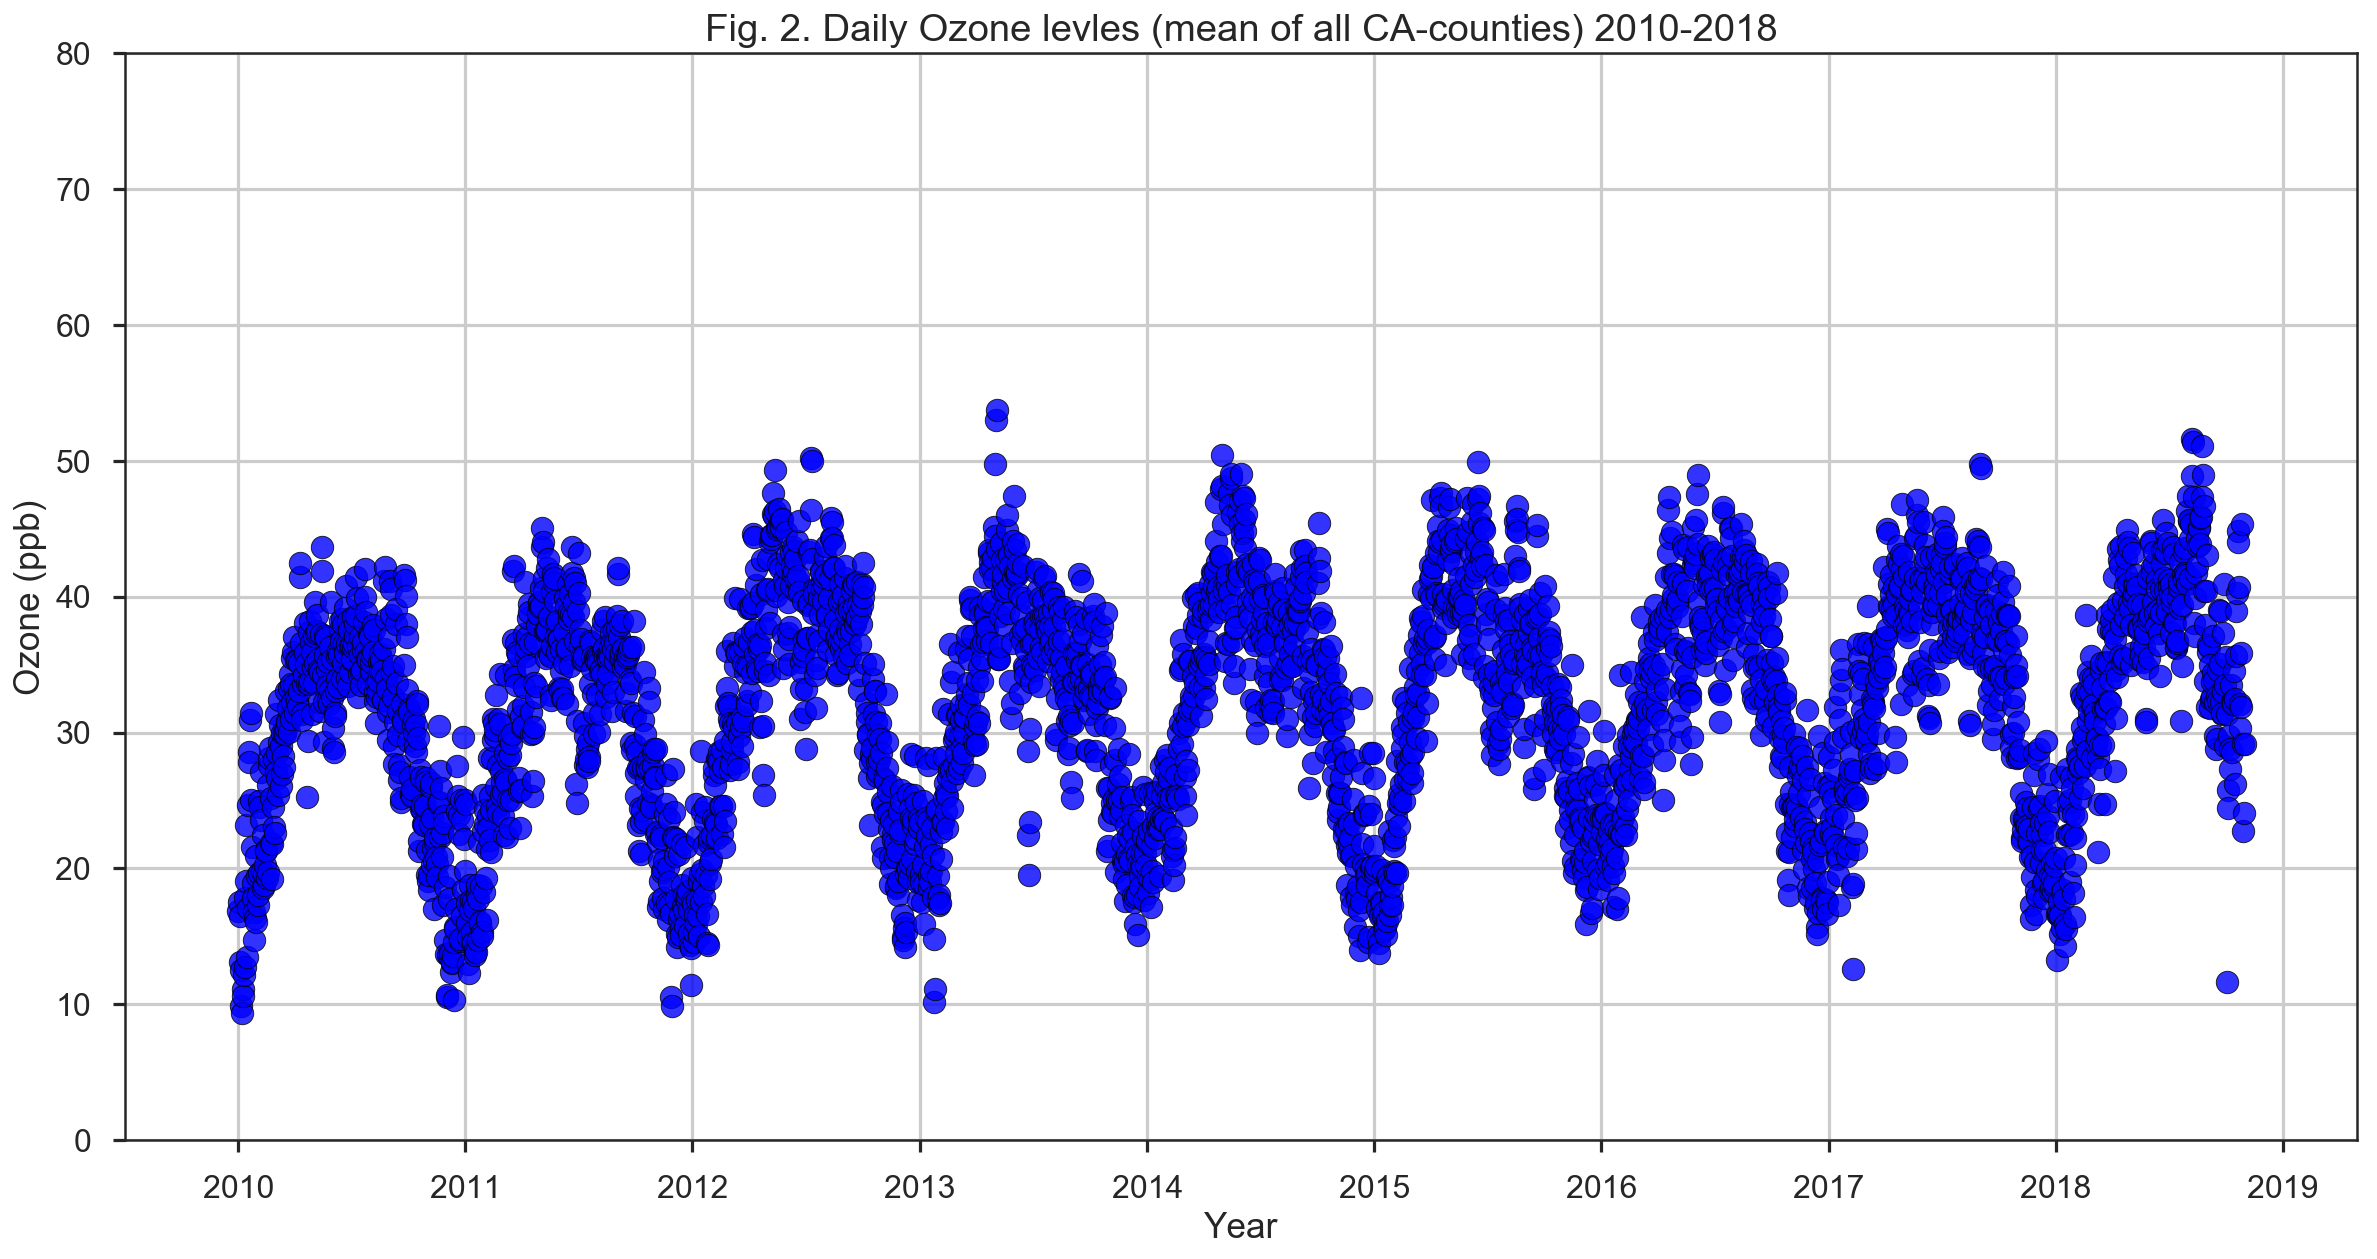

<Figure size 432x288 with 0 Axes>

In [458]:
plt.figure(figsize=(20,10))
plt.scatter(x_axis, y_axis, marker="o",  facecolors="blue", alpha= 0.8, edgecolors="black")
plt.ylim([0,80])
plt.title("Fig. 2. Daily Ozone levles (mean of all CA-counties) 2010-2018")
plt.ylabel("Ozone (ppb)")
plt.xlabel("Year")
plt.grid(True)
plt.show()
plt.savefig('Output1/Meanofallcounties_daily_O3_CA_2010_2018.png')

In [459]:
# Set up for SARIMA model

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

from __future__ import absolute_import, division, print_function

import sys
import os

import pandas as pd
import numpy as np

# Remote Data Access
# import pandas_datareader.data as web
import datetime
# reference: https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

# TSA from Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

from statsmodels.graphics.api import qqplot

# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.5f' % x) # pandas
np.set_printoptions(precision=5, suppress=True) # numpy

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# seaborn plotting style
sns.set(style='ticks', context='poster')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [473]:
# Import a time series
# This is a series that 

CAair = pd.read_csv("./Output1/CA_ozone_SARIMA.csv", header=0, index_col=0, parse_dates=[0])

In [474]:
# Examine the basic structure of the data
print("Data shape:", CAair.shape, "\n")
print("First 5 observations of the data series:", "\n", CAair.head())
print("Last 5 observations of the data series:", "\n", CAair.tail())

Data shape: (3226, 1) 

First 5 observations of the data series: 
             Ozone_ppb
Month                
2010-01-01   16.83765
2010-01-02   17.49472
2010-01-03   16.51526
2010-01-04   13.10099
2010-01-05   12.51283
Last 5 observations of the data series: 
             Ozone_ppb
Month                
2018-10-27   45.35300
2018-10-28   22.76500
2018-10-29   29.17600
2018-10-30   24.05900
2018-10-31   29.16700


In [475]:
#to view NAN values or zero values
#CAair.isnull().sum()

In [476]:
#CAair=CAair.dropna()

In [478]:

# from datetime import datetime
# dataset['Month']= pd.to_datetime(dataset['Date_Local'], infer_datetime_format = True)
# dataset=dataset.drop(['Date_Local'],axis=1)
# CAair = CAair.set_index(['Month'])
# CAair.head()
                        

In [479]:
CAair.to_csv('Output1\CA_Ozone_SARIMA.csv' )

In [480]:
# Data Visualization befor modeling
# TSA from Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

from statsmodels.graphics.api import qqplot
import matplotlib.pylab as plt
import seaborn as sns
# Examine the patterns of ACF and PACF (along with the time series plot and histogram)

def tsplot(y, lags=None, title='', figsize=(14, 10)):
    '''Examine the patterns of ACF and PACF, along with the time series plot and histogram.
    
    cumulative_ozone_SARIMA.csv files used
    '''
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=15)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    fig.tight_layout()
    return ts_ax, acf_ax, pacf_ax

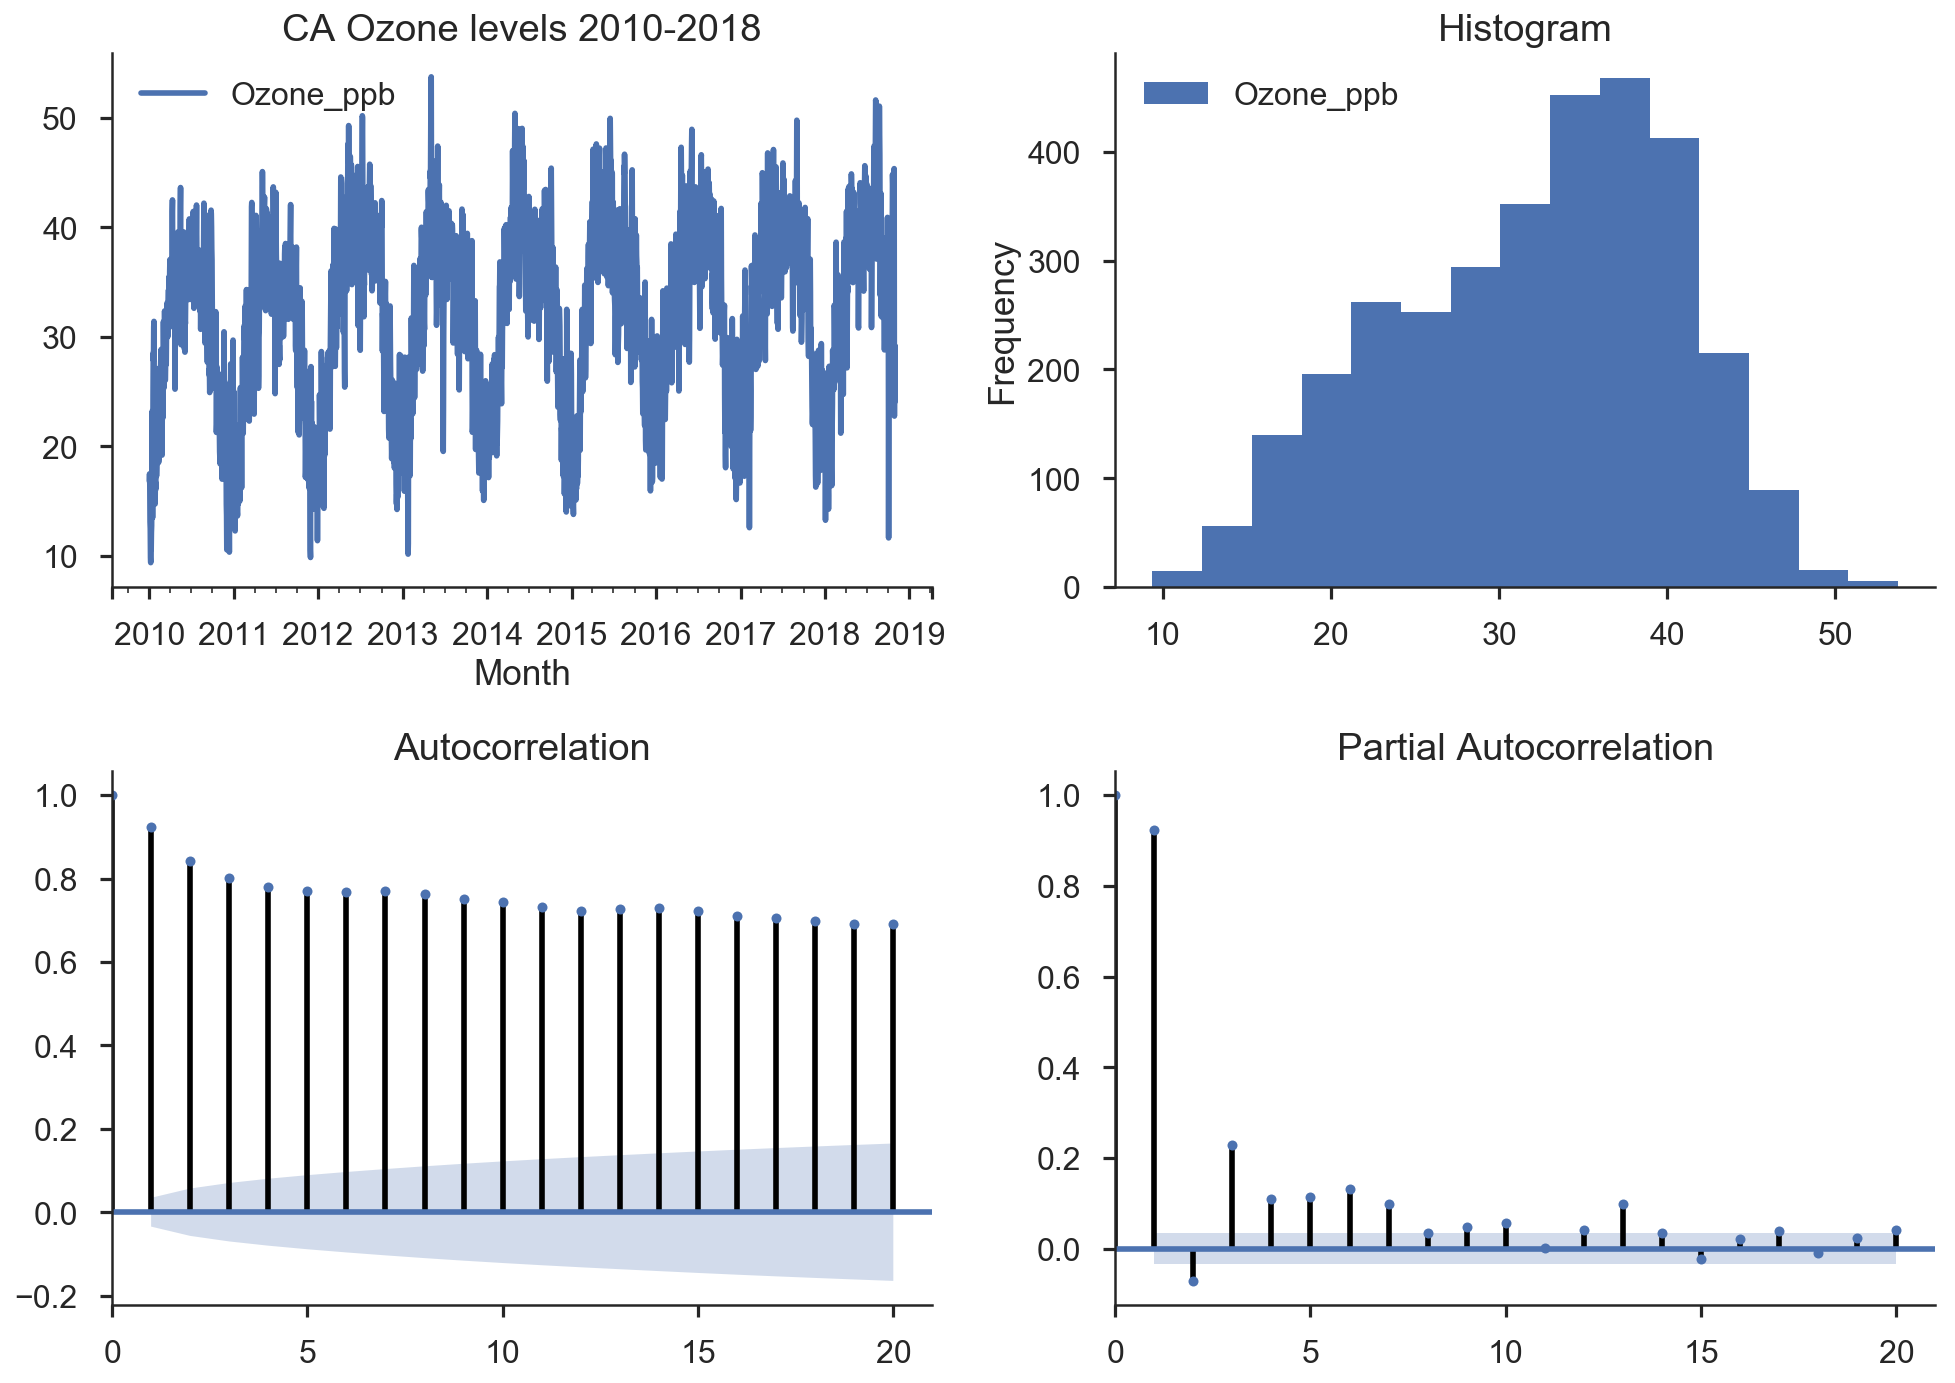

In [481]:
tsplot(CAair, title='CA Ozone levels 2010-2018', lags=20);

##Observations of these graphs:
The ozone levels slightly increasing over time
Most of the counties in CA show ozone levels between 30-40ppb.
The frequency of occurence above MPL of ozone levels in CA ~ 200 in some counties (~ central valley as inferred from the data by binning into four categories earlier) 
There appears to be seasonality
The autocorrelations remain strong throughout the series though slight shift 0.92 to 0.75.

C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


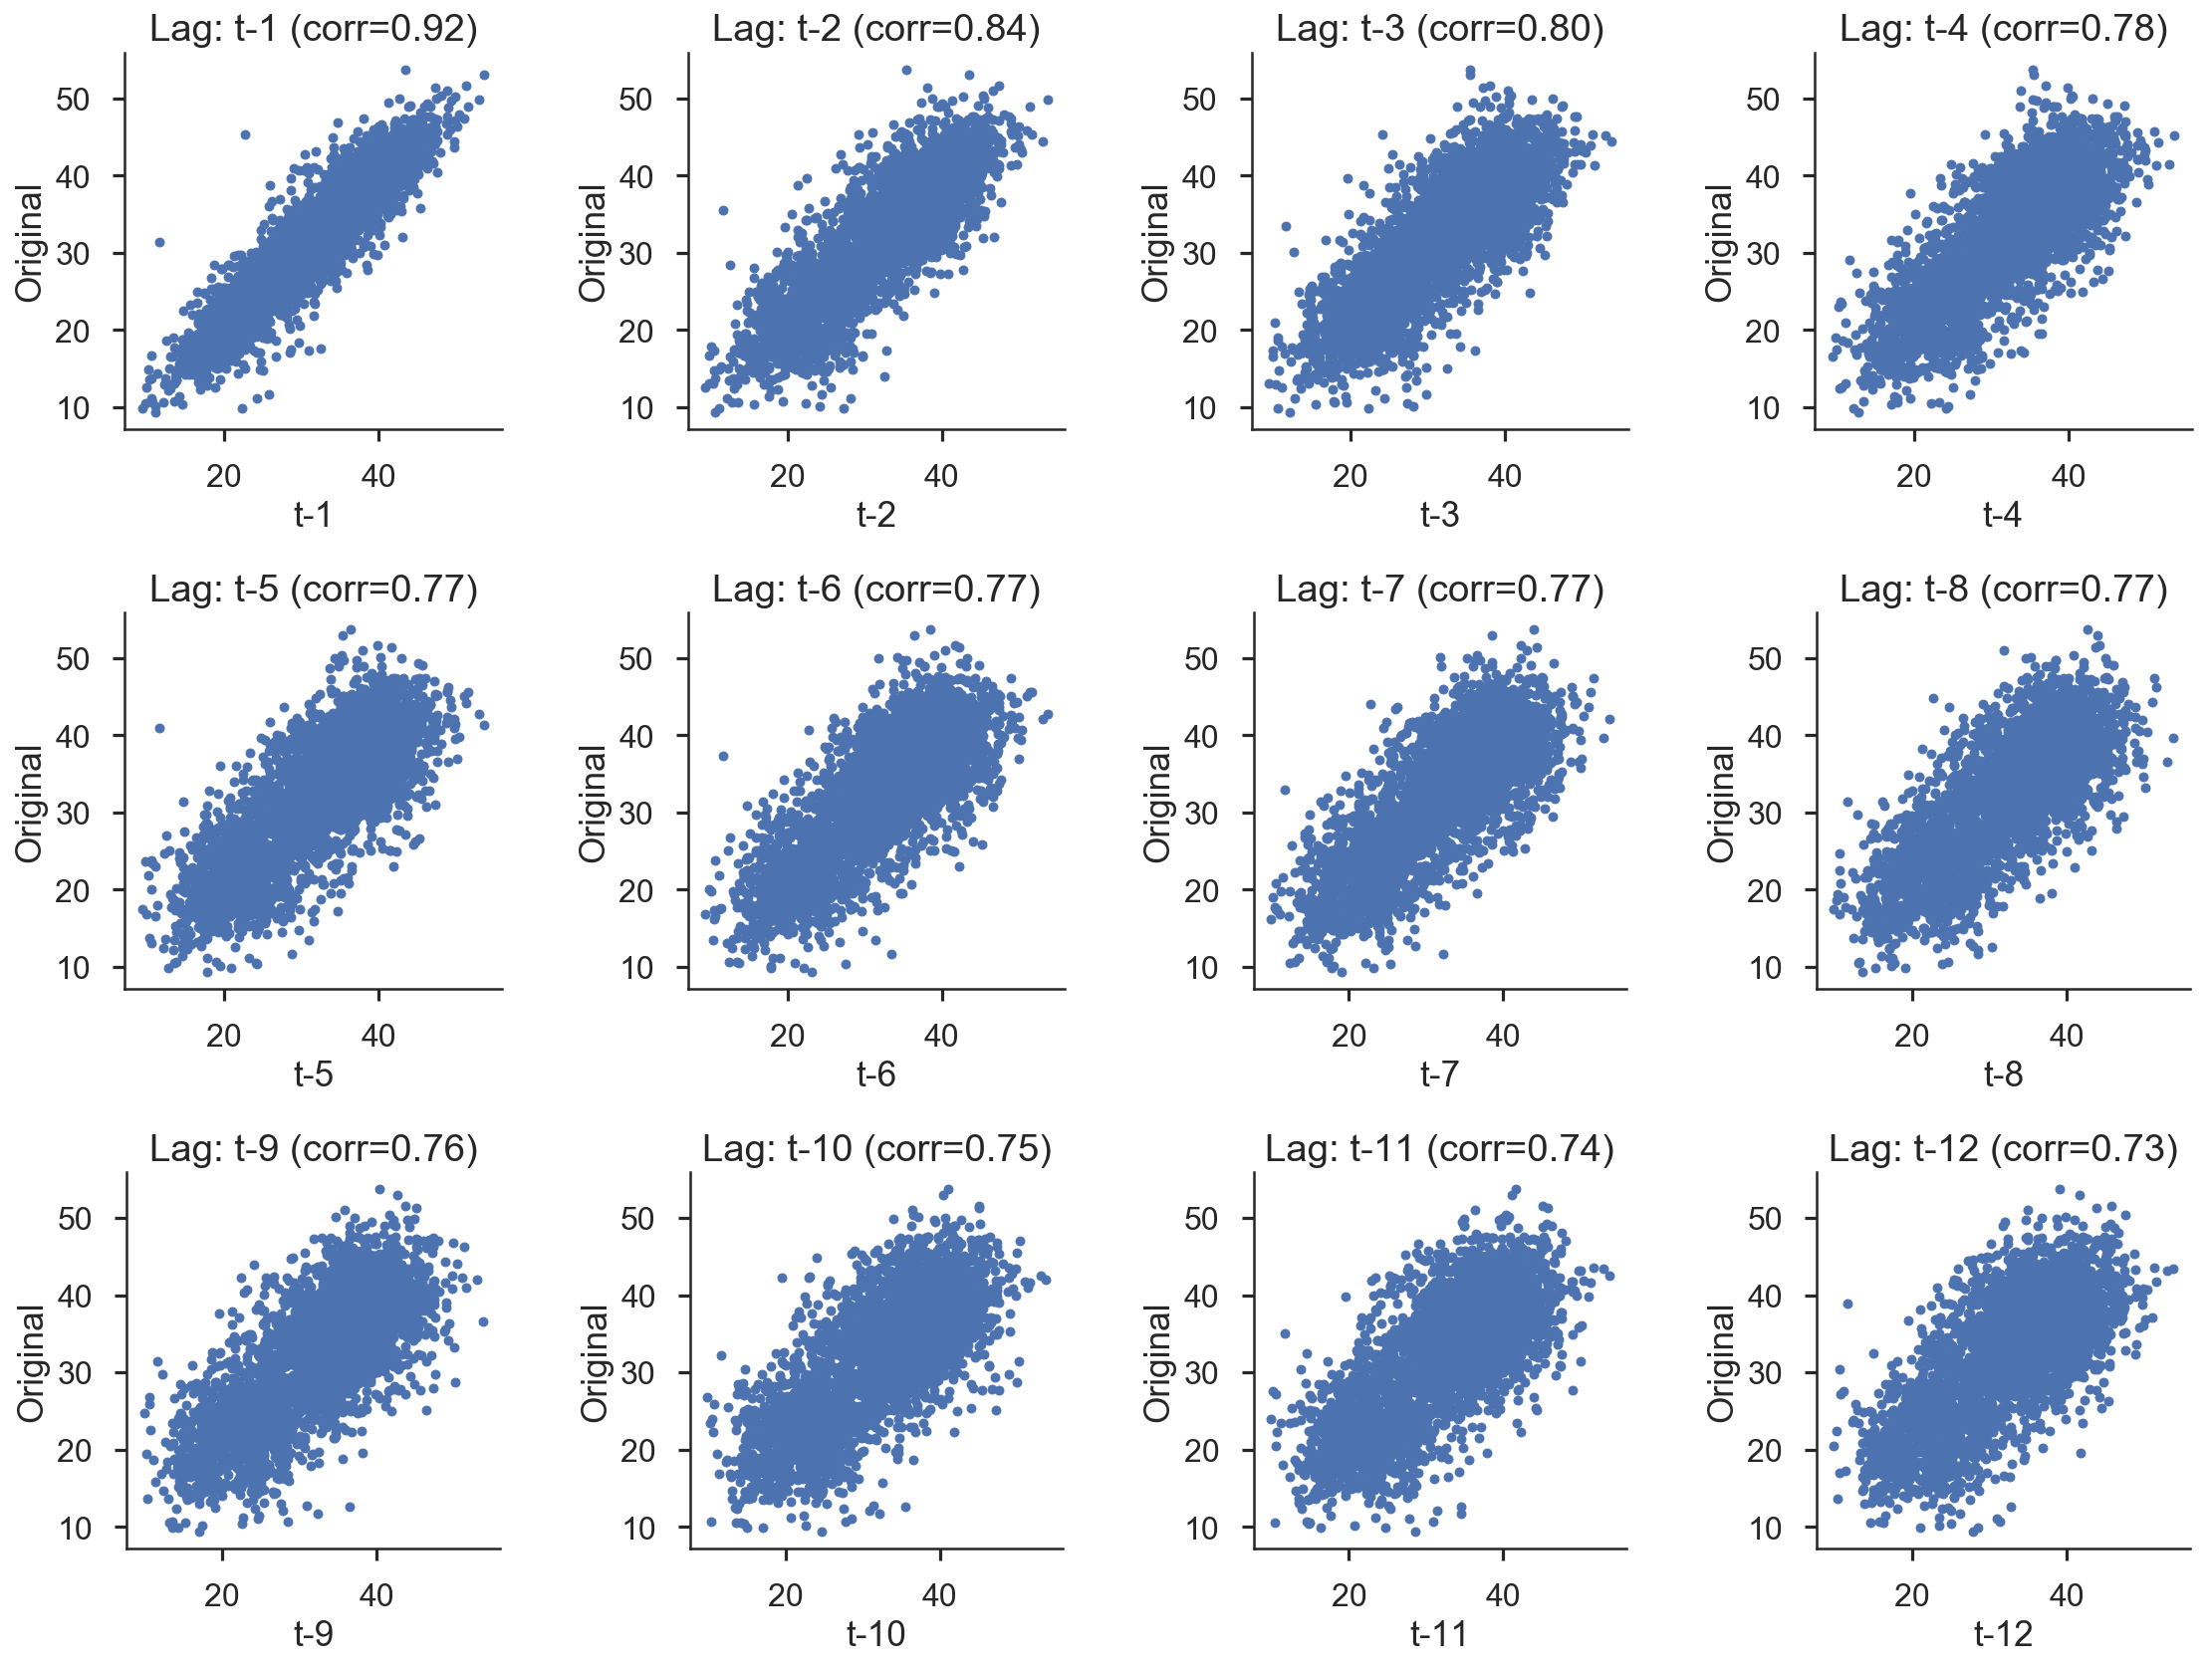

In [483]:
# Scatterplot matrix is another way to visualize the autocorrelation
# Its advantage is that it is very intuitive, as scatterplot (i.e. one of the plots in a scatterplot matrix) 
# is used often in practice

lags=12

ncols=4
nrows=int(np.ceil(lags/ncols))

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 4*nrows))

for ax, lag in zip(axes.flat, np.arange(1,lags+1, 1)):
    lag_str = 't-{}'.format(lag)
    X = (pd.concat([CAair, CAair.shift(-lag)], axis=1,
                   keys=['y'] + [lag_str]).dropna())

    X.plot(ax=ax, kind='scatter', y='y', x=lag_str);
    corr = X.corr().as_matrix()[0][1]
    ax.set_ylabel('Original')
    ax.set_title('Lag: {} (corr={:.2f})'.format(lag_str, corr));
    ax.set_aspect('equal');
    sns.despine();

fig.tight_layout();

In [484]:
# Import the csv file containing the series for the analysis
# This is the file we just analyzed in Exercise 2
ts_df = pd.read_csv("./Output1/CA_ozone_SARIMA.csv",header=0, index_col=0, parse_dates=[0])


n_sample = ts_df.shape[0]
print(ts_df.shape)
print(ts_df.head())

(3226, 1)
            Ozone_ppb
Month                
2010-01-01   16.83765
2010-01-02   17.49472
2010-01-03   16.51526
2010-01-04   13.10099
2010-01-05   12.51283


In [371]:
# ts_df=ts_df["Ozone_ppb"].values
# ts_df

array([16.83765, 17.49472, 16.51526, ..., 29.176  , 24.059  , 29.167  ])

In [485]:
# Create a training sample and testing sample before analyzing the series

n_train=int(0.95*n_sample)+1
n_forecast=n_sample-n_train
#ts_df
ts_train = ts_df.iloc[:n_train]
ts_test = ts_df.iloc[n_train:]
print(ts_train.shape)
print(ts_test.shape)
print("Training Series:", "\n", ts_train.tail(), "\n")
print("Testing Series:", "\n", ts_test.head())

(3065, 1)
(161, 1)
Training Series: 
             Ozone_ppb
Month                
2018-05-19   39.40848
2018-05-20   38.11056
2018-05-21   35.21164
2018-05-22   36.29687
2018-05-23   37.69746 

Testing Series: 
             Ozone_ppb
Month                
2018-05-24   37.32881
2018-05-25   31.01686
2018-05-26   30.80692
2018-05-27   34.73846
2018-05-28   38.21953


In [486]:
def tsplot(y, lags=None, title='', figsize=(14, 8)):
    '''Examine the patterns of ACF and PACF, along with the time series plot and histogram.
    
    Source: https://tomaugspurger.github.io/modern-7-timeseries.html
    '''
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=15)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    fig.tight_layout()
    return ts_ax, acf_ax, pacf_ax

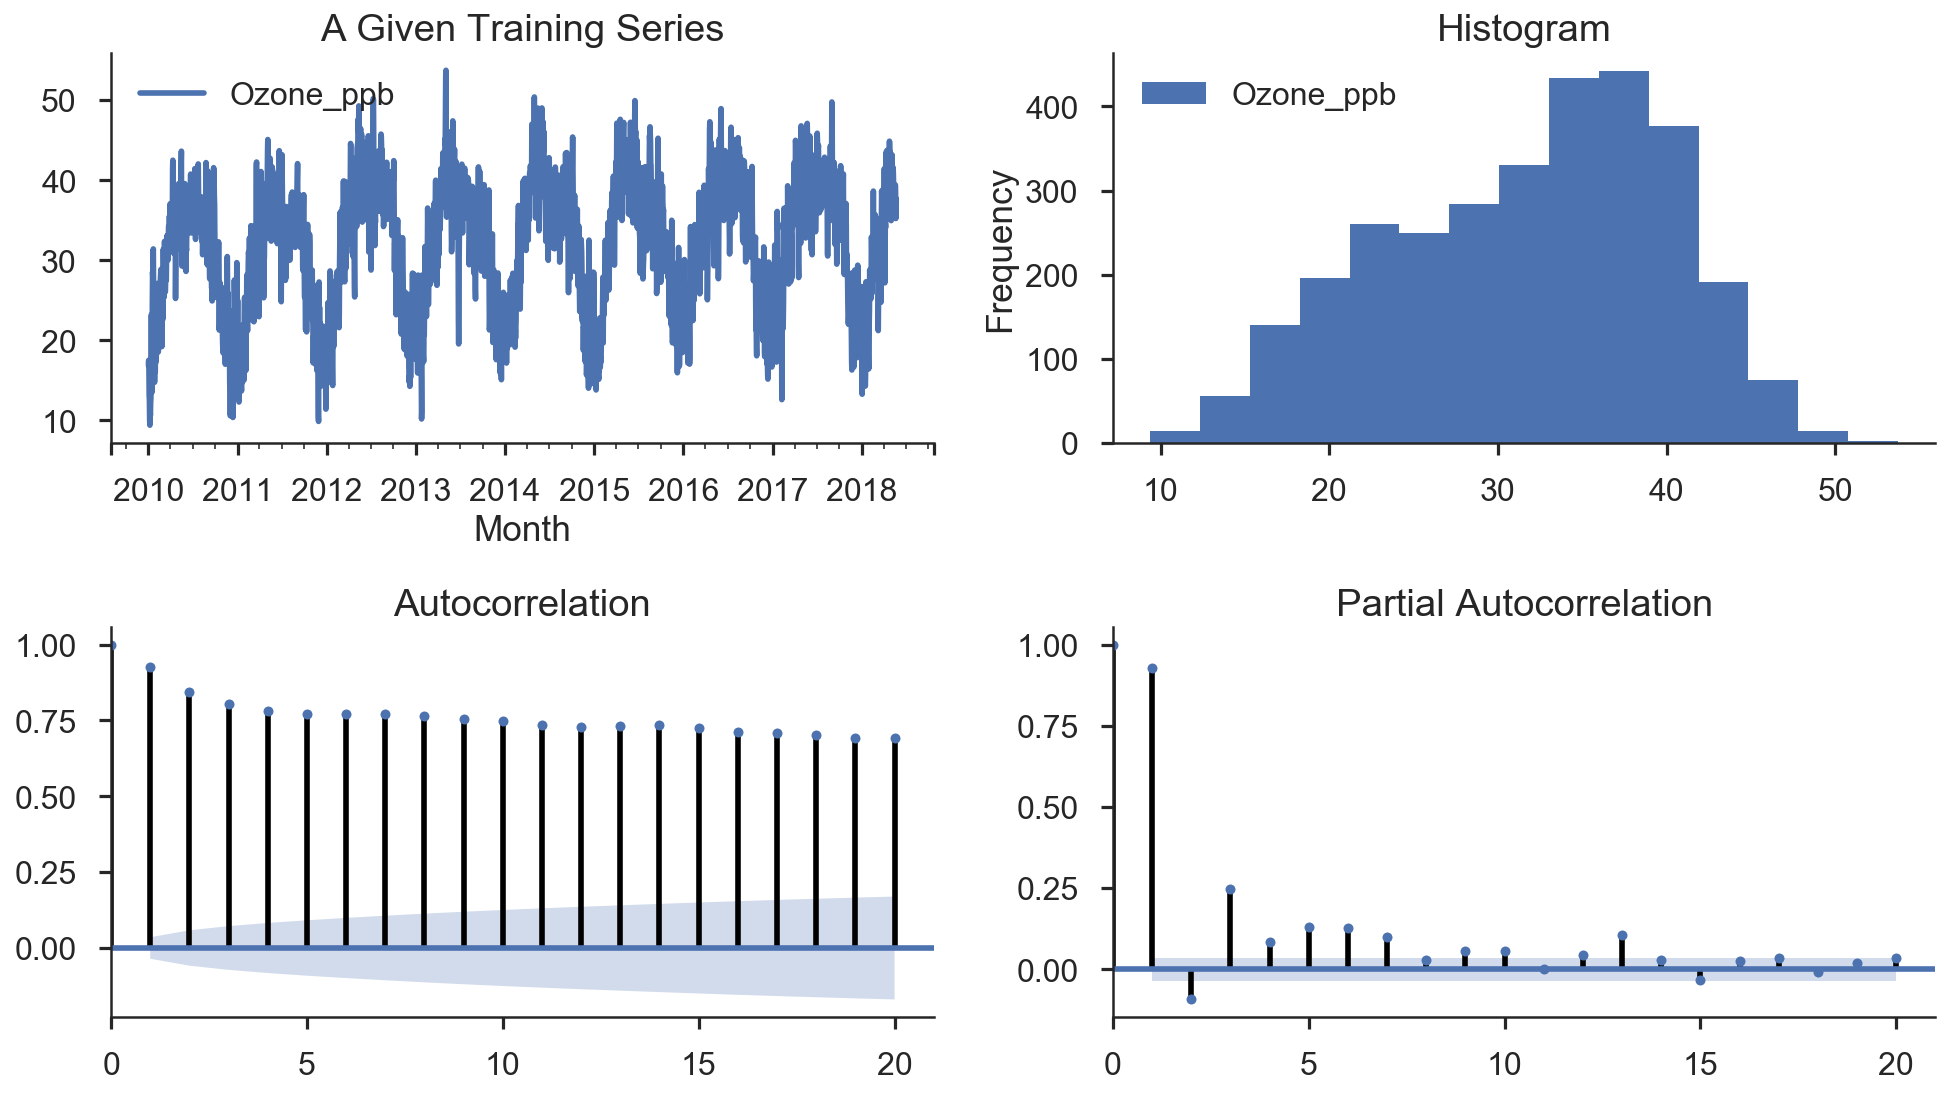

In [487]:
tsplot(ts_train, title='A Given Training Series', lags=20);

In [488]:
#Model Estimation

# Fit the model
# arima200 = sm.tsa.SARIMAX(ts_train, order=(2,0,0))
arima200 = sm.tsa.SARIMAX(ts_train, order=(1,0,1))
model_results = arima200.fit()
model_results.summary()

C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:              Ozone_ppb   No. Observations:                 3065
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -7863.331
Date:                Mon, 25 Mar 2019   AIC                          15732.663
Time:                        06:01:41   BIC                          15750.746
Sample:                    01-01-2010   HQIC                         15739.160
                         - 05-23-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9942      0.002    501.796      0.000       0.990       0.998
ma.L1          0.1156      0.017      6.993      0.000       0.083       0.148
sigma2         9.8912      0.208     47.633      0.000       9.484      10.298
===================================================================================
Ljung-Box (Q):                      443.21   Jarque-Bera (JB):               130.33
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                            -0.03
Prob(H) (two-sided):                  0.10   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [489]:
# Digression:
# In practice, one could search over a few models using the visual clues above as a starting point.
# The code below gives one such example

In [490]:
import itertools

p_min = 0
d_min = 0
q_min = 0
p_max = 4
d_max = 0
q_max = 4

# Initialize a DataFrame to store the results
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])

for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
    
    try:
        model = sm.tsa.SARIMAX(ts_train, order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                              )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)

C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency informa

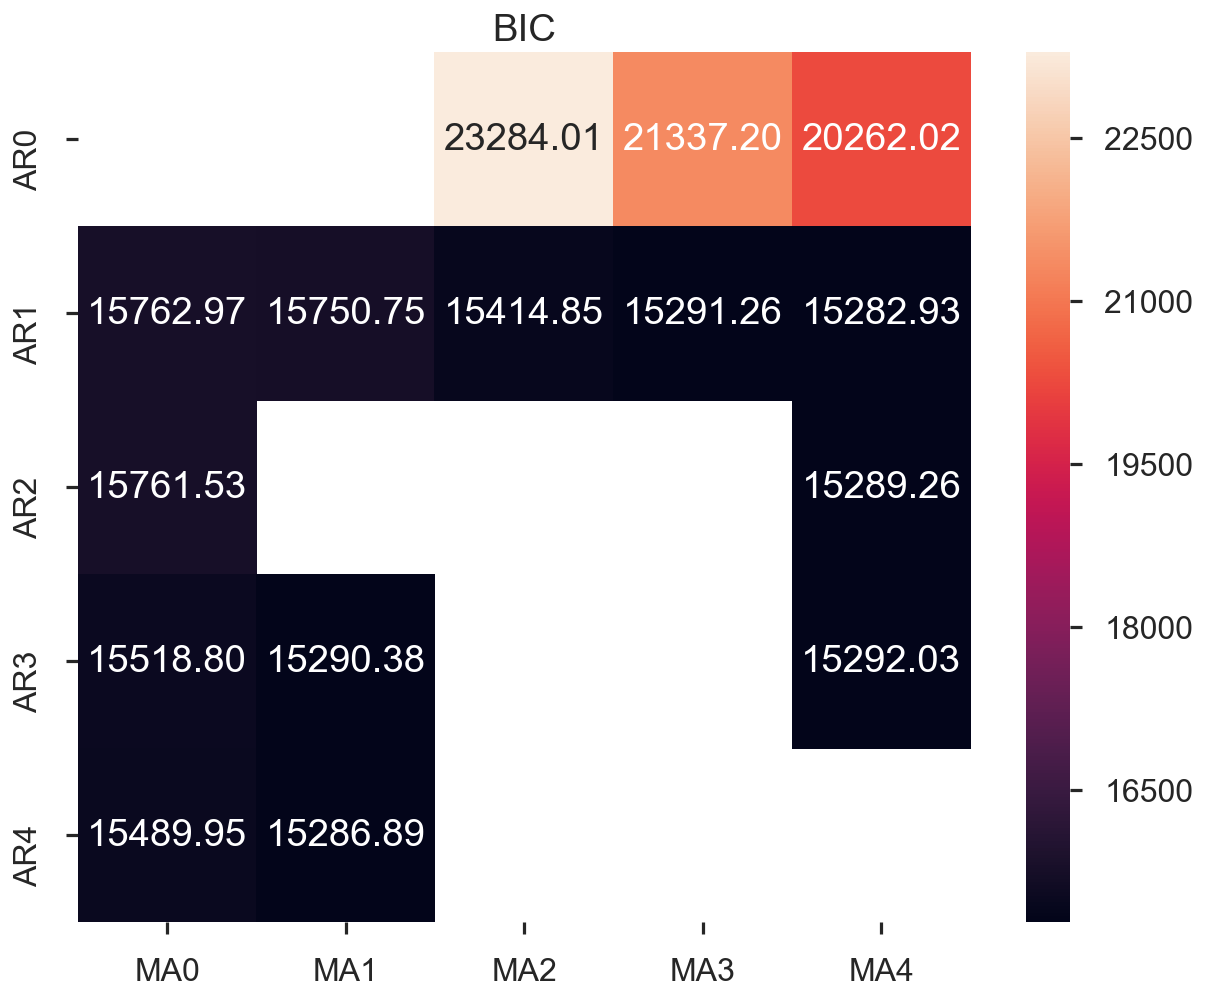

In [491]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 );
ax.set_title('BIC');

In [492]:
# Alternative model selection method, limited to only searching AR and MA parameters

train_results = sm.tsa.arma_order_select_ic(ts_train, ic=['aic', 'bic'], trend='nc', max_ar=4, max_ma=4)

print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)

C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information w

AIC (4, 4)
BIC (4, 4)


C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


##3.2 Model Diagnostic Checking
Conduct visual inspection of the residual plots
Residuals of a well-specified ARIMA model should mimic Gaussian white noises: the residuals should be uncorrelated and distributed approximated normally with mean zero and variance  n−1n−1 
Apparent patterns in the standardized residuals and the estimated ACF of the residuals give an indication that the model need to be re-specified
The results.plot_diagnostics() function conveniently produce several plots to facilitate the investigation.
The estimation results also come with some statistical tests

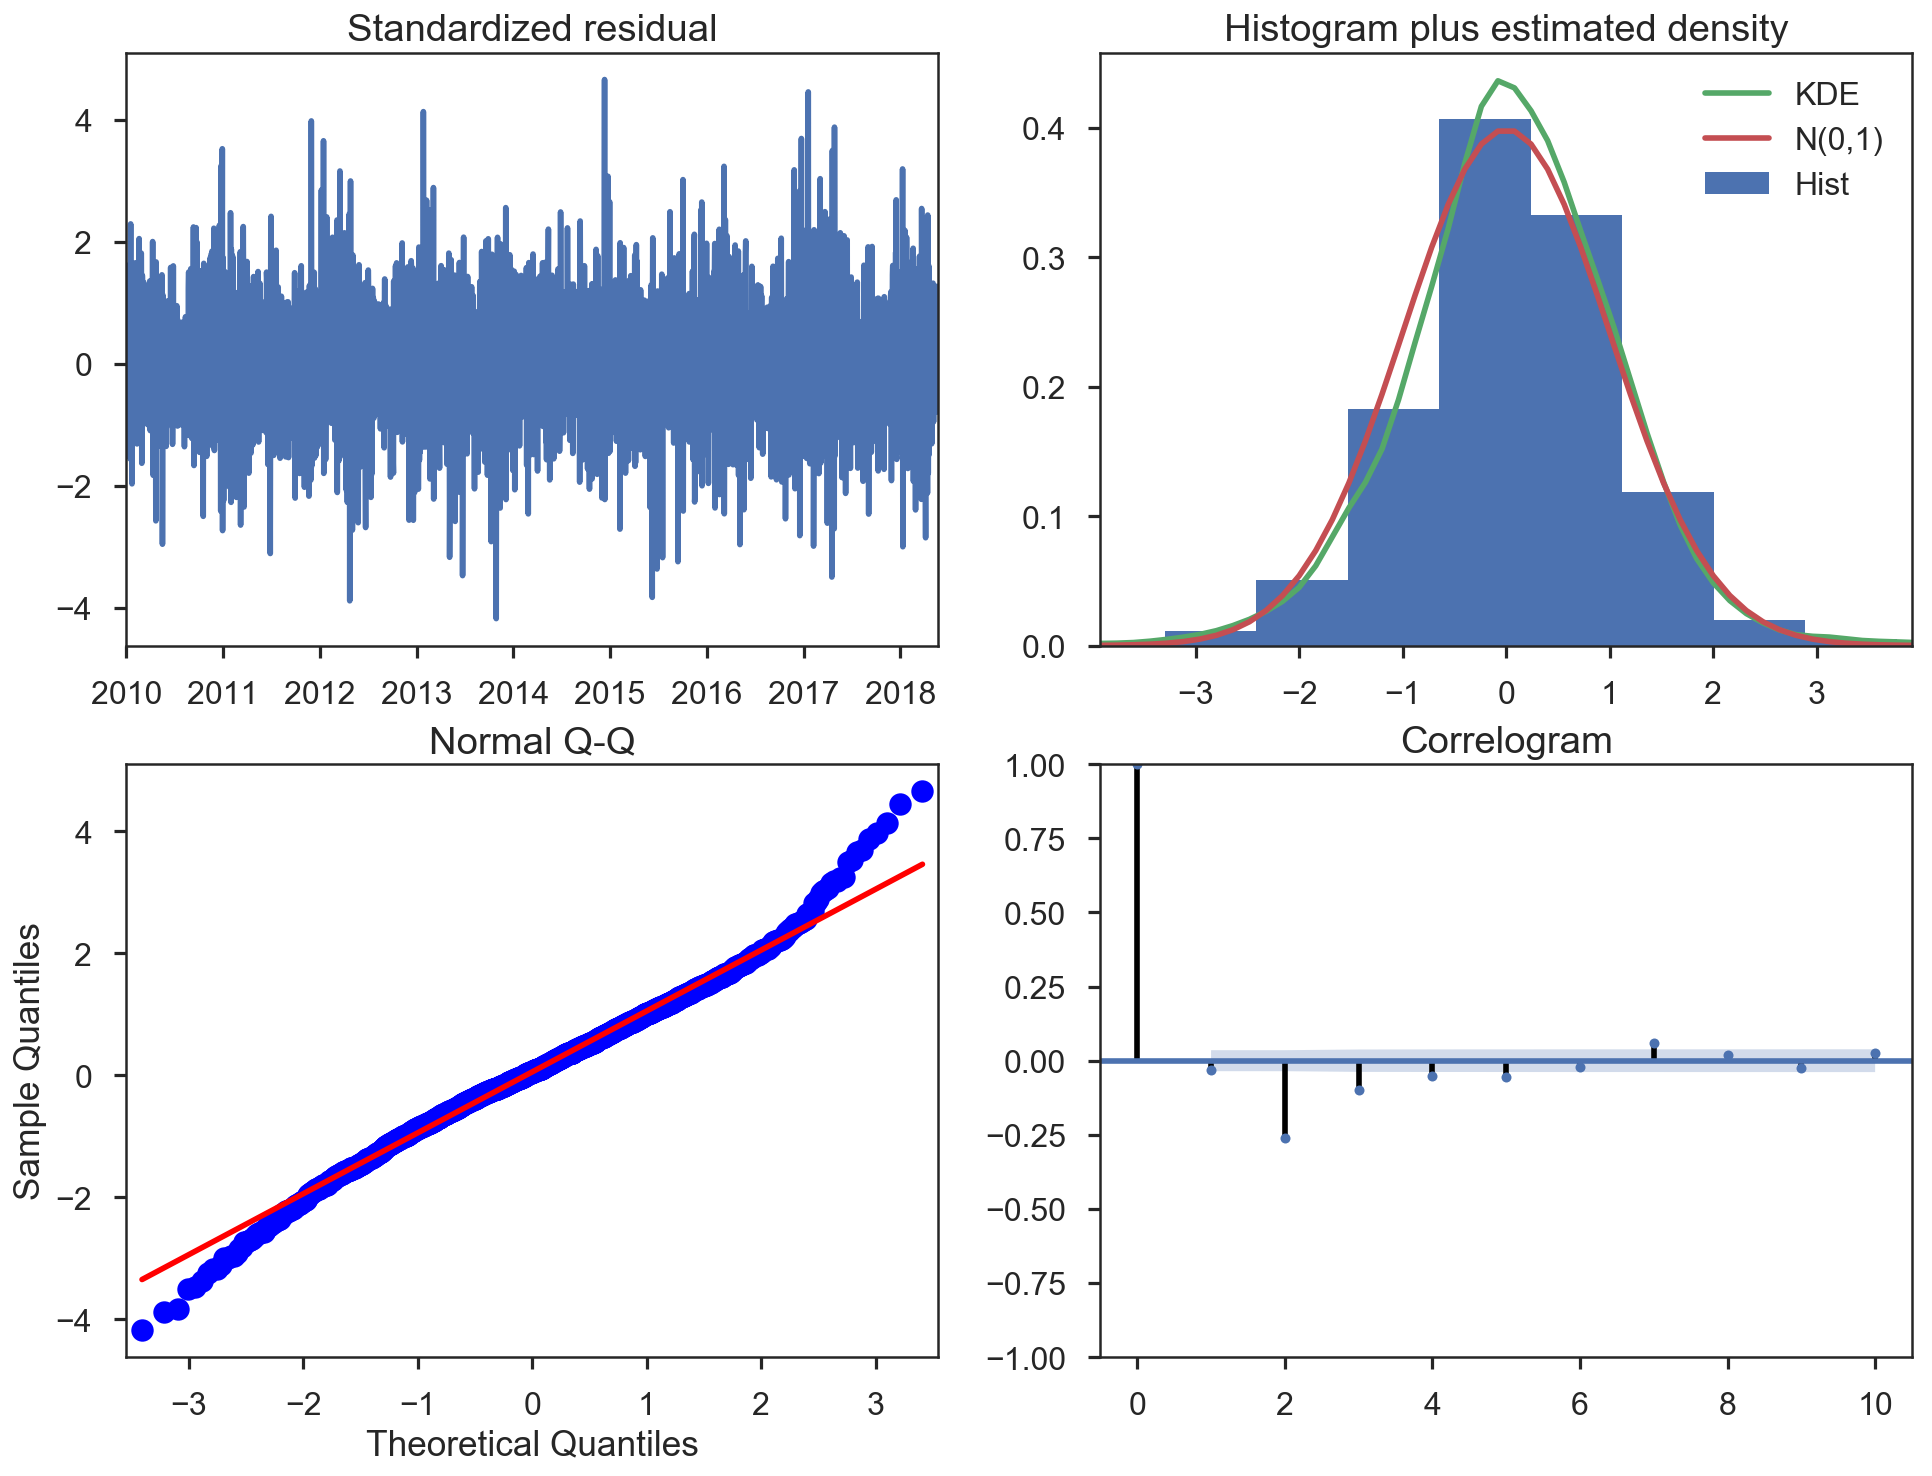

In [493]:
# Residual Diagnostics
# The plot_diagnostics function associated with the estimated result object produce a few plots that allow us 
# to examine the distribution and correlation of the estimated residuals

model_results.plot_diagnostics(figsize=(16, 12));

# 3.2.1 Formal testing
More information about the statistics under the parameters table, tests of standardized residuals

Test of heteroskedasticity
http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_heteroskedasticity.html#statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_heteroskedasticity
Test of normality (Jarque-Bera)¶
http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_normality.html#statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_normality
Test of serial correlation (Ljung-Box)
http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_serial_correlation.html#statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_serial_correlation

In [494]:
# Re-run the above statistical tests, and more. To be used when selecting viable models.

het_method='breakvar'
norm_method='jarquebera'
sercor_method='ljungbox'

(het_stat, het_p) = model_results.test_heteroskedasticity(het_method)[0]
norm_stat, norm_p, skew, kurtosis = model_results.test_normality(norm_method)[0]
sercor_stat, sercor_p = model_results.test_serial_correlation(method=sercor_method)[0]
sercor_stat = sercor_stat[-1] # last number for the largest lag
sercor_p = sercor_p[-1] # last number for the largest lag

# Run Durbin-Watson test on the standardized residuals.
# The statistic is approximately equal to 2*(1-r), where r is the sample autocorrelation of the residuals.
# Thus, for r == 0, indicating no serial correlation, the test statistic equals 2.
# This statistic will always be between 0 and 4. The closer to 0 the statistic,
# the more evidence for positive serial correlation. The closer to 4,
# the more evidence for negative serial correlation.
# Essentially, below 1 or above 3 is bad.
dw = sm.stats.stattools.durbin_watson(model_results.filter_results.standardized_forecasts_error[0, model_results.loglikelihood_burn:])

# check whether roots are outside the unit circle (we want them to be);
# will be True when AR is not used (i.e., AR order = 0)
arroots_outside_unit_circle = np.all(np.abs(model_results.arroots) > 1)
# will be True when MA is not used (i.e., MA order = 0)
maroots_outside_unit_circle = np.all(np.abs(model_results.maroots) > 1)

print('Test heteroskedasticity of residuals ({}): stat={:.3f}, p={:.3f}'.format(het_method, het_stat, het_p));
print('\nTest normality of residuals ({}): stat={:.3f}, p={:.3f}'.format(norm_method, norm_stat, norm_p));
print('\nTest serial correlation of residuals ({}): stat={:.3f}, p={:.3f}'.format(sercor_method, sercor_stat, sercor_p));
print('\nDurbin-Watson test on residuals: d={:.2f}\n\t(NB: 2 means no serial correlation, 0=pos, 4=neg)'.format(dw))
print('\nTest for all AR roots outside unit circle (>1): {}'.format(arroots_outside_unit_circle))
print('\nTest for all MA roots outside unit circle (>1): {}'.format(maroots_outside_unit_circle))


Test heteroskedasticity of residuals (breakvar): stat=1.109, p=0.098

Test normality of residuals (jarquebera): stat=130.325, p=0.000

Test serial correlation of residuals (ljungbox): stat=443.214, p=0.000

Durbin-Watson test on residuals: d=2.06
	(NB: 2 means no serial correlation, 0=pos, 4=neg)

Test for all AR roots outside unit circle (>1): True

Test for all MA roots outside unit circle (>1): True


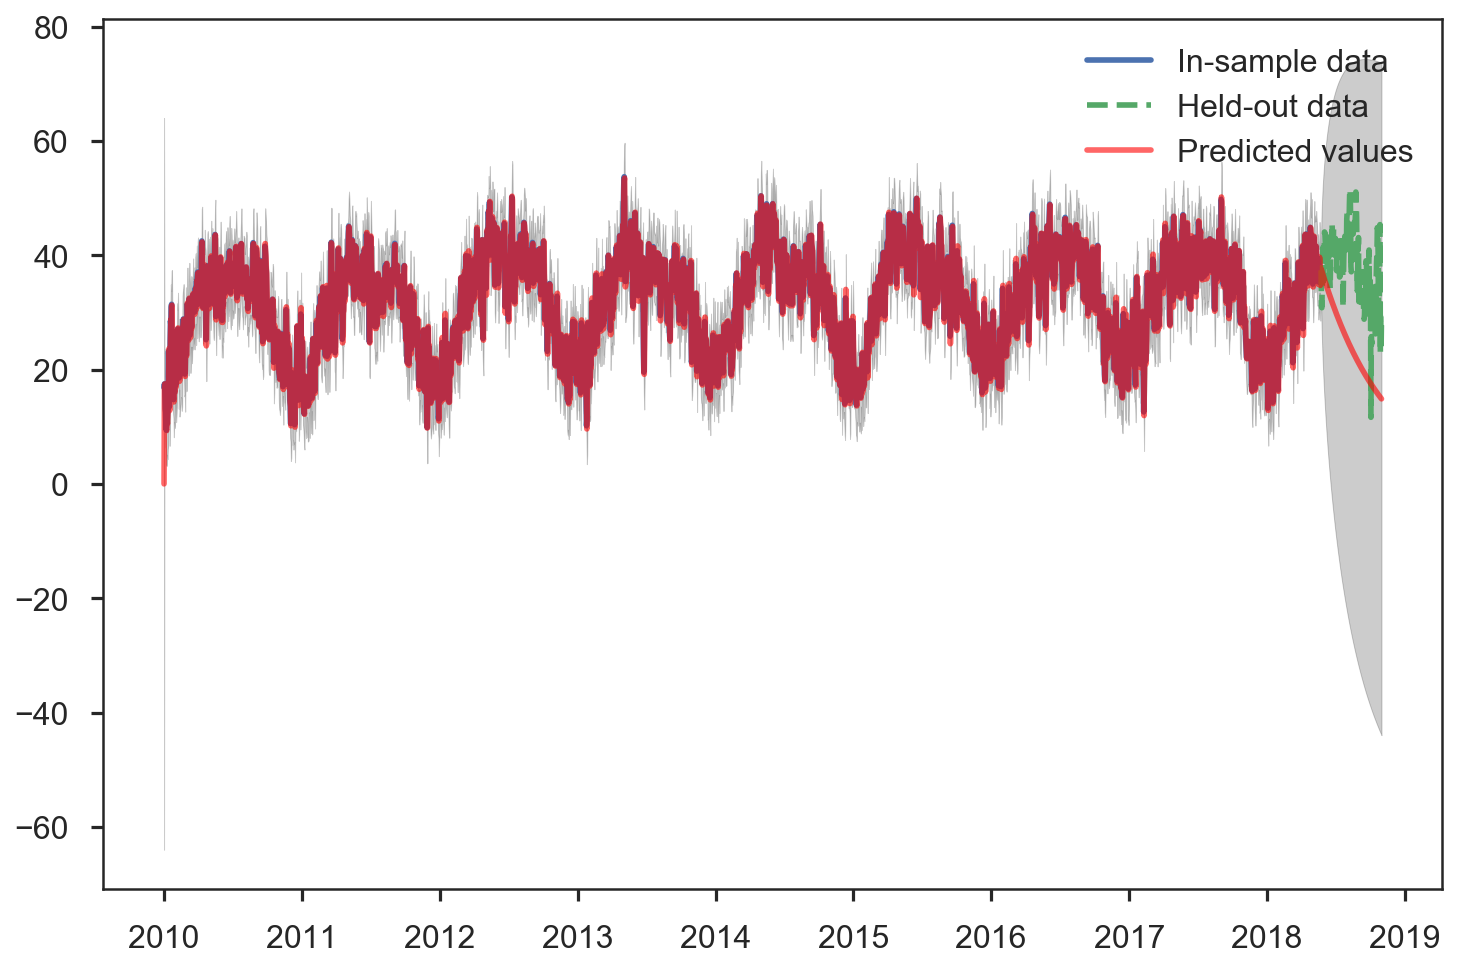

In [495]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
    
ax1.plot(ts_train, label='In-sample data', linestyle='-')
# subtract 1 only to connect it to previous point in the graph
ax1.plot(ts_test, label='Held-out data', linestyle='--')

# yes DatetimeIndex
pred_begin = ts_train.index[model_results.loglikelihood_burn]
pred_end = ts_test.index[-1]
pred = model_results.get_prediction(start=pred_begin.strftime('%Y-%m-%d'),
                                    end=pred_end.strftime('%Y-%m-%d'))
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int(alpha=0.05)

ax1.plot(pred_mean, 'r', alpha=.6, label='Predicted values')
ax1.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.2)

ax1.legend(loc='best');

In [496]:
#Remove NAN values
ts_df.dropna(inplace = True)
ts_df.head(10)

,Ozone_ppb
Month,
2010-01-01,16.83765
2010-01-02,17.49472
2010-01-03,16.51526
2010-01-04,13.10099
2010-01-05,12.51283
2010-01-06,9.89640
2010-01-07,9.38925
2010-01-08,11.11058
2010-01-09,10.60368


In [497]:
def get_rmse(y, y_hat):
    '''Root Mean Square Error
    https://en.wikipedia.org/wiki/Root-mean-square_deviation
    '''
    mse = np.mean((y - y_hat)**2)
    return np.sqrt(mse)

def get_mape(y, y_hat):
    '''Mean Absolute Percent Error
    https://en.wikipedia.org/wiki/Mean_absolute_percentage_error
    '''
    perc_err = (100*(y - y_hat))/y
    return np.mean(abs(perc_err))

def get_mase(y, y_hat):
    '''Mean Absolute Scaled Error
    https://en.wikipedia.org/wiki/Mean_absolute_scaled_error
    '''
    abs_err = abs(y - y_hat)
    dsum=sum(abs(y[1:] - y_hat[1:]))
    t = len(y)
    denom = (1/(t - 1))* dsum
    return np.mean(abs_err/denom)

In [498]:
rmse = get_rmse(ts_train, pred_mean.ix[ts_train.index])
print("RMSE: ", rmse)

mape = get_mape(ts_train, pred_mean.ix[ts_train.index])
print("MAPE: ", mape)

mase = get_mase(ts_train, pred_mean.ix[ts_train.index])
print("MASE: ", mase)

C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


RMSE:  2010-01-01 00:00:00   nan
2010-01-02 00:00:00   nan
2010-01-03 00:00:00   nan
2010-01-04 00:00:00   nan
2010-01-05 00:00:00   nan
2010-01-06 00:00:00   nan
2010-01-07 00:00:00   nan
2010-01-08 00:00:00   nan
2010-01-09 00:00:00   nan
2010-01-10 00:00:00   nan
2010-01-11 00:00:00   nan
2010-01-12 00:00:00   nan
2010-01-13 00:00:00   nan
2010-01-14 00:00:00   nan
2010-01-15 00:00:00   nan
2010-01-16 00:00:00   nan
2010-01-17 00:00:00   nan
2010-01-18 00:00:00   nan
2010-01-19 00:00:00   nan
2010-01-20 00:00:00   nan
2010-01-21 00:00:00   nan
2010-01-22 00:00:00   nan
2010-01-23 00:00:00   nan
2010-01-24 00:00:00   nan
2010-01-25 00:00:00   nan
2010-01-26 00:00:00   nan
2010-01-27 00:00:00   nan
2010-01-28 00:00:00   nan
2010-01-29 00:00:00   nan
2010-01-30 00:00:00   nan
2010-01-31 00:00:00   nan
2010-02-01 00:00:00   nan
2010-02-02 00:00:00   nan
2010-02-03 00:00:00   nan
2010-02-04 00:00:00   nan
2010-02-05 00:00:00   nan
2010-02-06 00:00:00   nan
2010-02-07 00:00:00   nan
2010-

C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\generic.py:7388: RuntimeWarning: Cannot compare type 'Timestamp' with type 'str', sort order is undefined for incomparable objects
  other.columns, how=join, level=level, return_indexers=True)


MAPE:  2010-01-01 00:00:00   nan
2010-01-02 00:00:00   nan
2010-01-03 00:00:00   nan
2010-01-04 00:00:00   nan
2010-01-05 00:00:00   nan
2010-01-06 00:00:00   nan
2010-01-07 00:00:00   nan
2010-01-08 00:00:00   nan
2010-01-09 00:00:00   nan
2010-01-10 00:00:00   nan
2010-01-11 00:00:00   nan
2010-01-12 00:00:00   nan
2010-01-13 00:00:00   nan
2010-01-14 00:00:00   nan
2010-01-15 00:00:00   nan
2010-01-16 00:00:00   nan
2010-01-17 00:00:00   nan
2010-01-18 00:00:00   nan
2010-01-19 00:00:00   nan
2010-01-20 00:00:00   nan
2010-01-21 00:00:00   nan
2010-01-22 00:00:00   nan
2010-01-23 00:00:00   nan
2010-01-24 00:00:00   nan
2010-01-25 00:00:00   nan
2010-01-26 00:00:00   nan
2010-01-27 00:00:00   nan
2010-01-28 00:00:00   nan
2010-01-29 00:00:00   nan
2010-01-30 00:00:00   nan
2010-01-31 00:00:00   nan
2010-02-01 00:00:00   nan
2010-02-02 00:00:00   nan
2010-02-03 00:00:00   nan
2010-02-04 00:00:00   nan
2010-02-05 00:00:00   nan
2010-02-06 00:00:00   nan
2010-02-07 00:00:00   nan
2010-

C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


ValueError: Cannot add integral value to Timestamp without freq.

In [100]:
#Performing Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(IndexedDataset['Ozone_ppb'], autolag ='AIC')
dfoutput = pd.Series(dftest[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -3.961347
p-value                           0.001627
#Lags Used                       28.000000
Number of Observations Used    3197.000000
Critical Value (1%)              -3.432397
Critical Value (5%)              -2.862444
Critical Value (10%)             -2.567251
dtype: float64


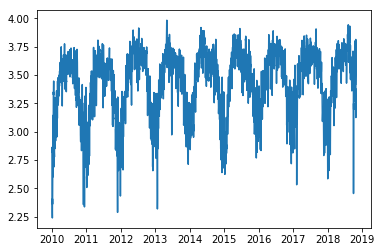

In [101]:
#Estimating Trend
plt.figure(figsize=(10,7))
IndexedDataset_logscale = np.log(IndexedDataset)
plt.plot(IndexedDataset_logscale)

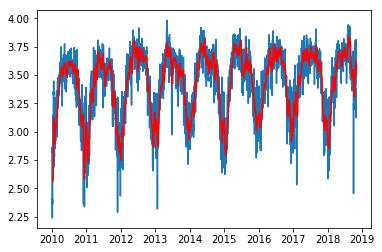

In [102]:
movingAverage = IndexedDataset_logscale.rolling(window=12).mean()
movingSTD = IndexedDataset_logscale.rolling(window =12).std()
plt.plot(IndexedDataset_logscale, color = 'blue')
plt.plot(movingAverage, color = 'red')
plt.plot(movingSTD, color = 'black')
plt.legend(loc = 'best')
plt.title('Logscale: moving Avg and moving STD')
plt.show(block = False)

In [106]:
datasetLogScaleMinusMovingAverage = IndexedDataset_logscale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)



,Ozone_ppb
Month,
2010-01-01,NaN
2010-01-02,NaN
2010-01-03,NaN
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,NaN
2010-01-09,NaN


In [482]:
#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace = True)
datasetLogScaleMinusMovingAverage.head(10)

,Ozone_ppb
Month,
2010-01-12,0.31387
2010-01-13,0.54948
2010-01-14,0.34462
2010-01-15,0.01653
2010-01-16,0.23044
2010-01-17,0.54192
2010-01-18,0.59942
2010-01-19,0.48381
2010-01-20,0.50364


In [129]:
#It is not needed in this case???
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determining rolling statistics
    movingAverage = timeseries.rolling(window = 12).mean()
    movingSTD= timeseries.rolling(window = 12).std()
    #Plot Rolling statistics:
    plt.figure(figsize=(10,7))
    orig = plt.plot(timeseries, color = 'blue',  label = 'Original')
    mean = plt.plot(timeseries, color = 'red', alpha = 0.6, label = 'Rolling Mean')
    std  = plt.plot(timeseries, color = 'black', alpha = 0.6, label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block = False)
    
    #Perform Dickey-Fuller Test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Ozone_ppb'], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                   -3.961347
p-value                           0.001627
#Lags Used                       28.000000
Number of Observations Used    3197.000000
Critical Value (1%)              -3.432397
Critical Value (5%)              -2.862444
Critical Value (10%)             -2.567251
dtype: float64


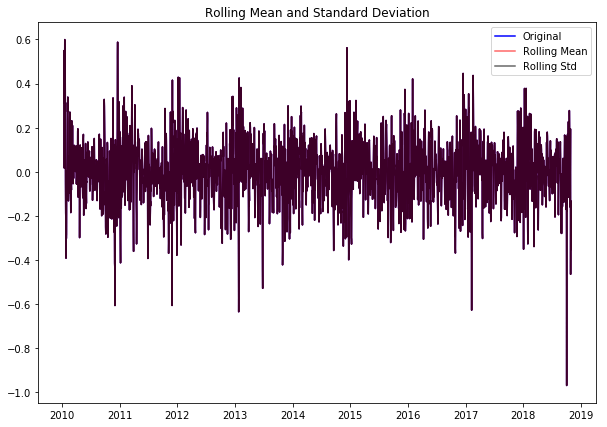

Results of Dickey-Fuller Test:


In [130]:
test_stationarity(datasetLogScaleMinusMovingAverage)

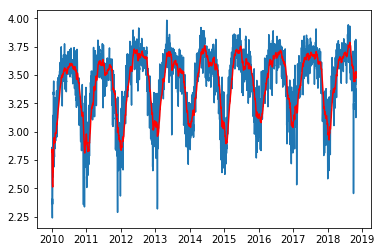

In [131]:
exponentialDecayWeightedAverage = IndexedDataset_logscale.ewm(halflife = 12, min_periods= 0, adjust = True).mean()
plt.plot(IndexedDataset_logscale)
plt.plot(exponentialDecayWeightedAverage, color = 'red')

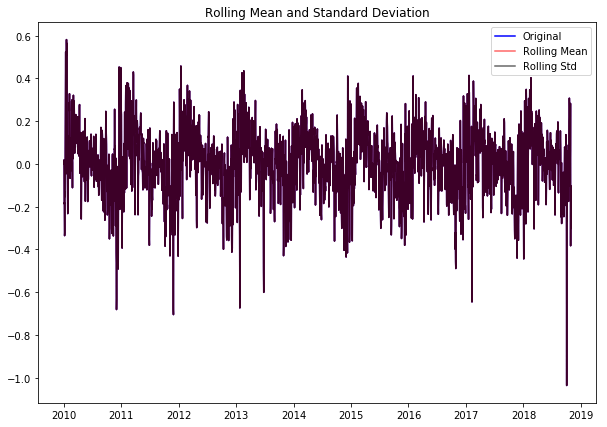

Results of Dickey-Fuller Test:


In [133]:
datasetLogScaleMinusMovingExponentialDecayAverage = IndexedDataset_logscale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

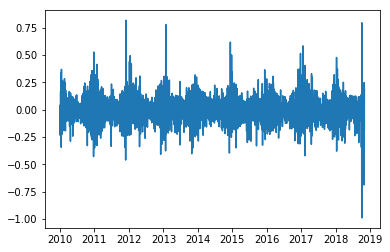

In [135]:
datasetLogDiffShifting = IndexedDataset_logscale - IndexedDataset_logscale.shift()
plt.plot(datasetLogDiffShifting)

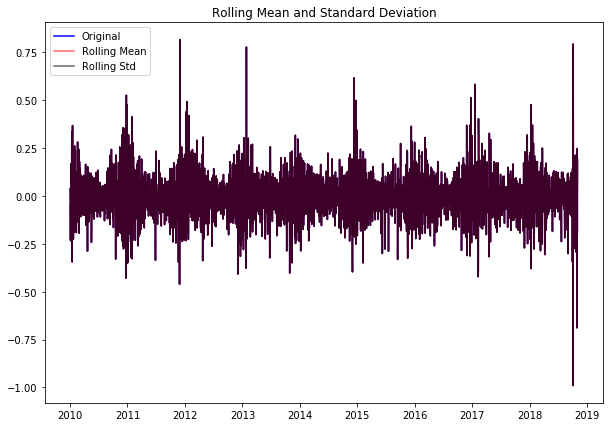

Results of Dickey-Fuller Test:


In [137]:
datasetLogDiffShifting.dropna(inplace = True)
test_stationarity(datasetLogDiffShifting)

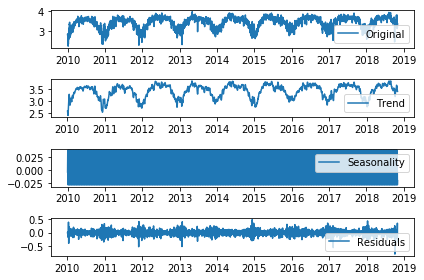

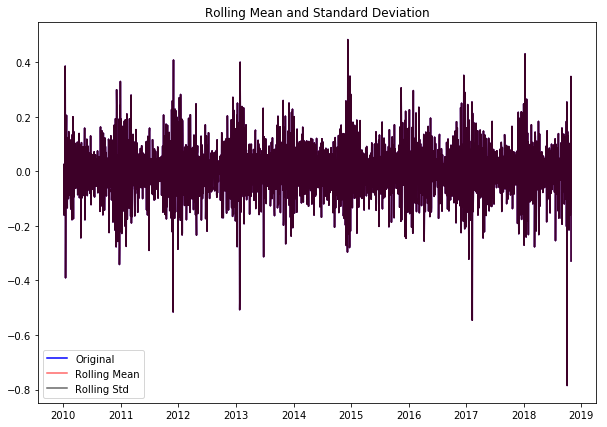

Results of Dickey-Fuller Test:


In [141]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompositon = seasonal_decompose(IndexedDataset_logscale)

trend = decompositon.trend
seasonal = decompositon.seasonal
residual = decompositon.resid

plt.subplot(411)
plt.plot(IndexedDataset_logscale, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label ='Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

# decomposedLogData = residual
# decomposedLogData.dropna(inplace = True)
# test_stationarity(decomposedLogData)

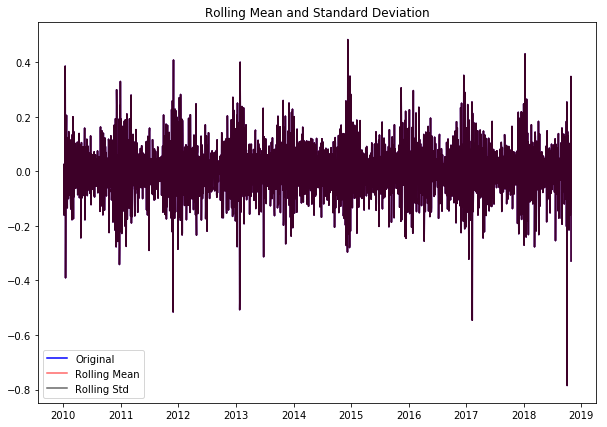

Results of Dickey-Fuller Test:


In [142]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)

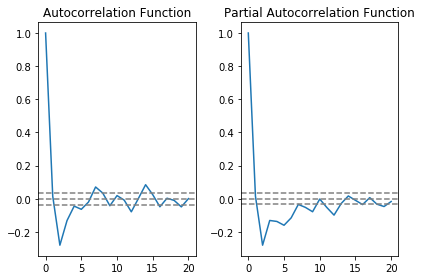

In [149]:
#ACF and PACF plots:

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags = 20)
lag_pacf = pacf(datasetLogDiffShifting, nlags = 20, method = 'ols')

# #Plot ACF:
# plt.subplot(121)
# plt.plot(lag_acf)
# plt.axhline(y = 0, linestyle = '--', color = 'gray')
# plt.axhline(y = -1.96/np.sqrt(len(datasetLogDiffShifting)), linesytle = '-', color = 'gray')
# plt.axhline(y = 1.96/np.sqrt(len(datasetLogDiffShifting)), linesytle = '-', color = 'gray')
# plt.title('Autocorrelation Function')

# #plot PACF
# plt.subplot(122)
# plt.plot(lag_pacf)
# plt.axhline(y = 0, linestyle = '--', color = 'gray')
# plt.axhline(y = -1.96/np.sqrt(len(datasetLogDiffShifting)), linesytle = '--', color = 'gray')
# plt.axhline(y = 1.96/np.sqrt(len(datasetLogDiffShifting)), linesytle = '--', color = 'gray')
# plt.title('Partial Autocorrelation Function')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR model


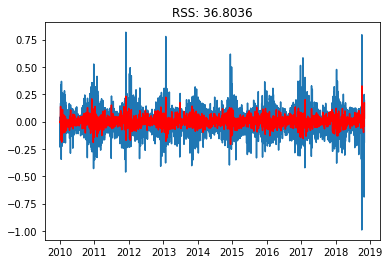

In [162]:
from statsmodels.tsa.arima_model import ARIMA

#AR model
model = ARIMA(IndexedDataset_logscale, order=(2, 1, 2))  
results_AR = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['Ozone_ppb'])**2))
print('Plotting AR model')

C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR model


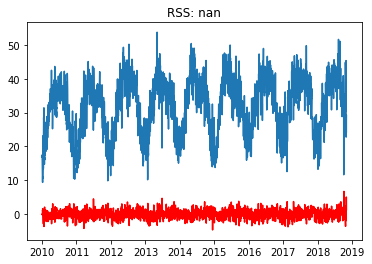

In [161]:
from statsmodels.tsa.arima_model import ARIMA

#AR model
model = ARIMA(IndexedDataset, order=(2, 1, 2))  
results_AR = model.fit(disp=-1)  
plt.plot(IndexedDataset)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-IndexedDataset['Ozone_ppb'])**2))
print('Plotting AR model')

TypeError: unhashable type: 'numpy.ndarray'

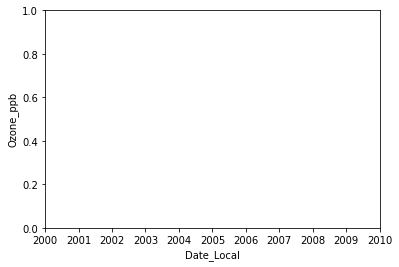